In [55]:
import tensorflow as tf

# Check if GPU is recognized
if tf.test.is_gpu_available():
    print("GPU is available and TensorFlow can use it!")
    print("GPU Device:", tf.config.list_physical_devices('GPU'))
else:
    print("No GPU found. Check your TensorFlow and CUDA setup.")


GPU is available and TensorFlow can use it!
GPU Device: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [24]:
%run confg

Data preprocessing complete. Final file saved as: cleaned_combined_data.csv


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [26]:
data = pd.read_csv("cleaned_combined_data.csv")

print("Data Information:\n")
print(data.info())
print("\nMissing Values:\n")
print(data.isnull().sum())



Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109157 entries, 0 to 109156
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Tweet_id   72434 non-null   float64
 1   sentiment  109157 non-null  object 
 2   Text       109156 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.5+ MB
None

Missing Values:

Tweet_id     36723
sentiment        0
Text             1
dtype: int64


In [27]:
print("\nData Preview:")
data.head(10)


Data Preview:


,Tweet_id,sentiment,Text
0,1.221884e+18,neutral,الزعل بيغير ملامحك بيغير نظرة العين بيغير شك...
1,1.221884e+18,neutral,@halgawi @DmfMohe ليس حباً في ايران بقدر ماهو ...
2,1.221881e+18,neutral,@adalfahadduwail أبي أعرف الحاكم العربي المسلم...
3,1.221882e+18,neutral,@sarmadbouchamou @DimaSadek في الخطاب تبع سليم...
4,1.221880e+18,neutral,@FofaMahmouddd مفيش الكلام ده في الزمن
5,1.226410e+18,neutral,@elm عندي مشكله لما تبي اجدد إقامة عامل حاولت ...
6,1.221882e+18,neutral,الرئاسة الفلسطينية تدعو السفراء العرب والمسلمي...
7,1.221883e+18,neutral,@Hamed_Alali التجنيس يضر اهل السنه في سوريا تت...
8,1.221885e+18,neutral,سوّف تبحثُ عني في شخصٍ آخر
9,1.221883e+18,neutral,@Beethoven_7 كل ما أملكه في تلك الحياة هو كرام...


In [28]:
print("\nSentiment Class Distribution:")
print(data['sentiment'].value_counts())


Sentiment Class Distribution:
sentiment
neutral     49854
negative    30157
positive    29146
Name: count, dtype: int64


In [31]:
%run text_preprocessing

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data preprocessing complete. File saved as final_file.csv.


In [38]:
data = pd.read_csv("final_file.csv")


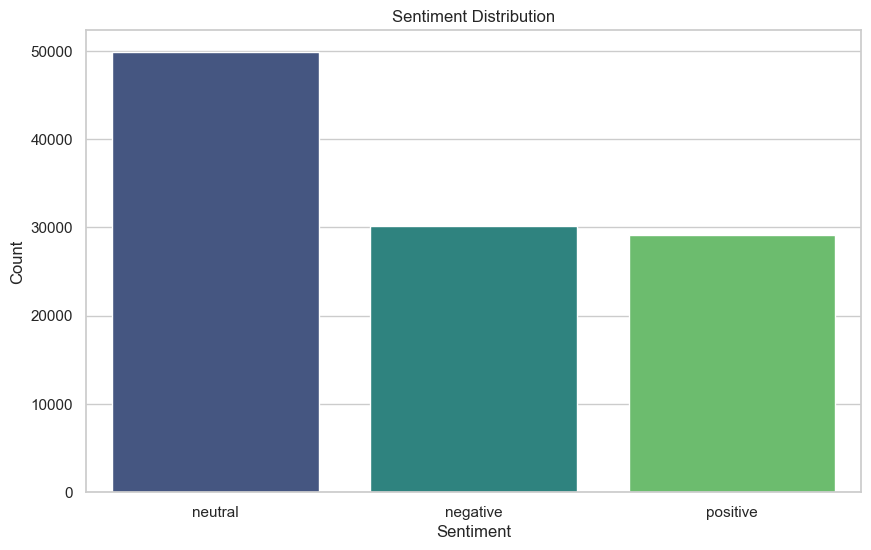

In [39]:
sns.countplot(x='sentiment', hue='sentiment', data=data, palette='viridis', dodge=False, legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

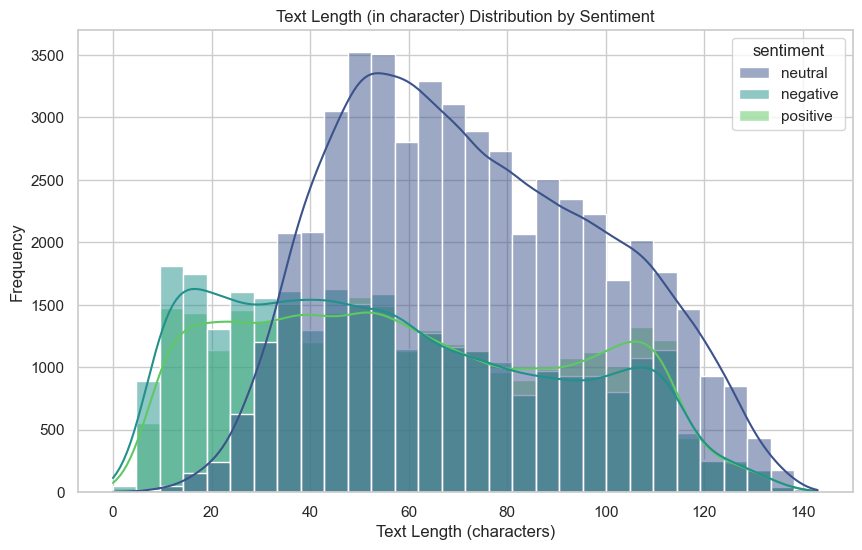

In [40]:
# Ensure that 'Text' column is filled with empty strings for NaN values and converted to strings
data['Text'] = data['Text'].fillna('').astype(str)

# Calculate the text length
data['text_length'] = data['Text'].apply(len)

# Plotting text length distribution by sentiment
sns.histplot(data=data, x='text_length', hue='sentiment', bins=30, kde=True, palette='viridis')
plt.title("Text Length (in character) Distribution by Sentiment")
plt.xlabel("Text Length (characters)")
plt.ylabel("Frequency")
plt.show()



In [41]:
print("\nAverage Text Length by Sentiment:")
data.groupby('sentiment')['text_length'].mean()


Average Text Length by Sentiment:


sentiment
negative    56.917695
neutral     73.024993
positive    60.530296
Name: text_length, dtype: float64

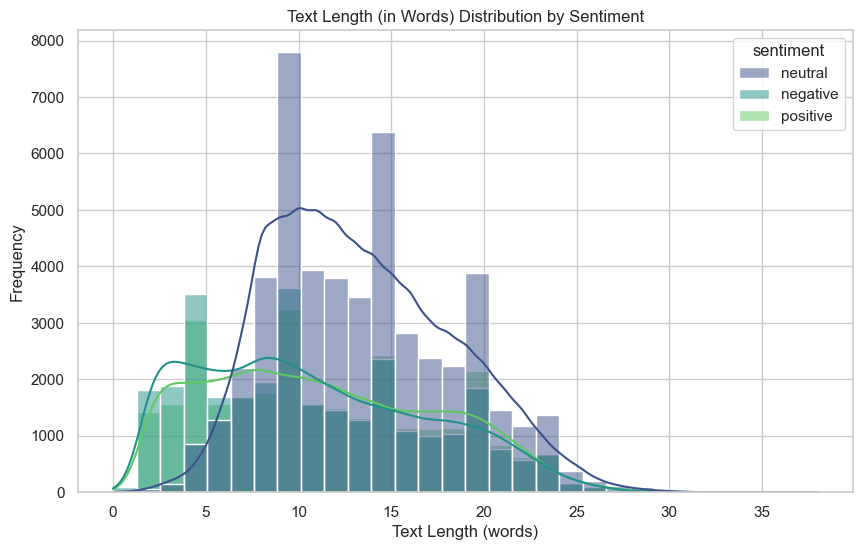

In [42]:
data['text_length_words'] = data['Text'].apply(lambda x: len(x.split()))

sns.histplot(data=data, x='text_length_words', hue='sentiment', bins=30, kde=True, palette='viridis')
plt.title("Text Length (in Words) Distribution by Sentiment")
plt.xlabel("Text Length (words)")
plt.ylabel("Frequency")
plt.show()

In [43]:
print("\nAverage Text Length (in Words) by Sentiment:")
data.groupby('sentiment')['text_length_words'].mean()


Average Text Length (in Words) by Sentiment:


sentiment
negative    10.730700
neutral     13.419525
positive    11.310300
Name: text_length_words, dtype: float64

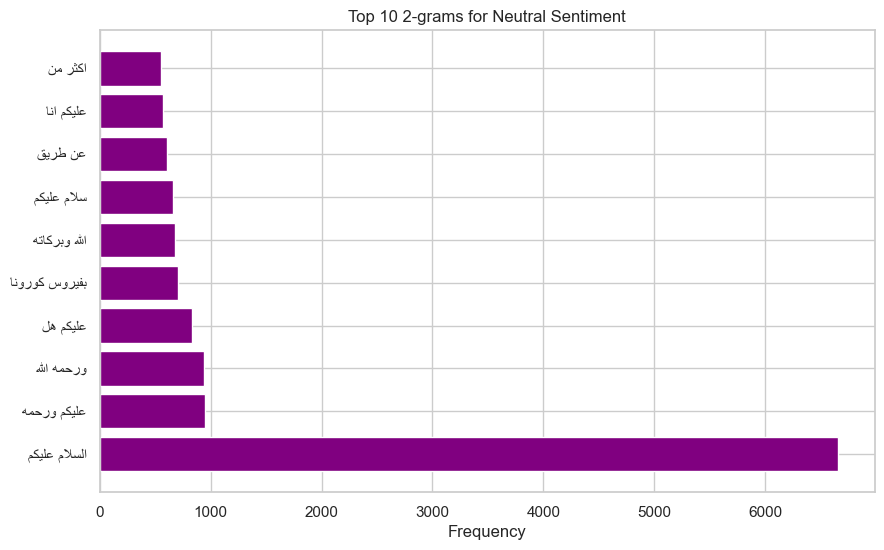

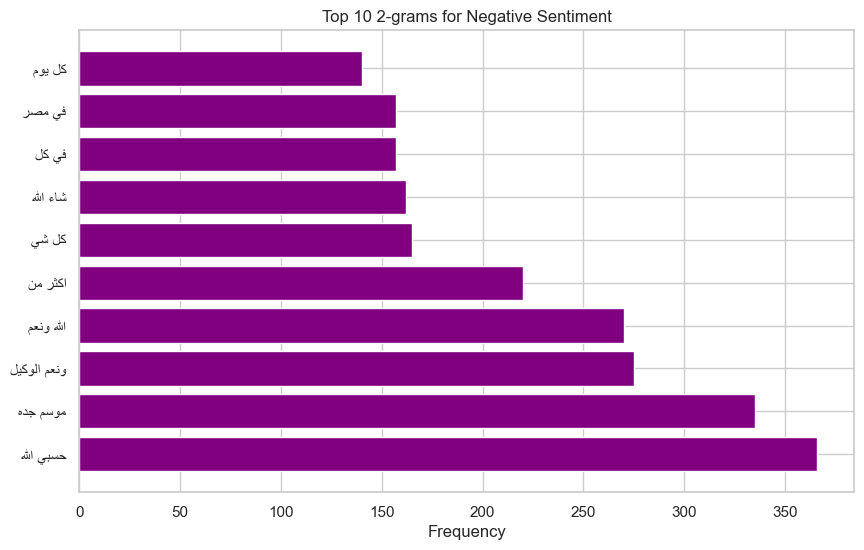

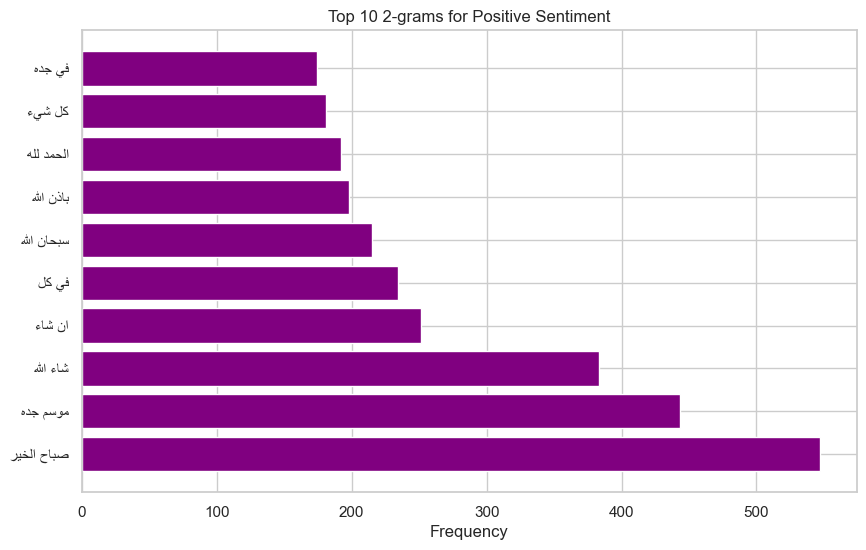

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
import arabic_reshaper
from bidi.algorithm import get_display

# Define a function to plot top N-grams with Arabic reshaping
def plot_top_ngrams(data, sentiment, n=2, top_k=10):
    sentiment_text = data[data['sentiment'] == sentiment]['Text']
    vec = CountVectorizer(ngram_range=(n, n)).fit(sentiment_text)
    ngrams = vec.transform(sentiment_text)
    ngram_counts = ngrams.sum(axis=0).A1
    vocab = vec.get_feature_names_out()
    ngram_freq = dict(zip(vocab, ngram_counts))
    sorted_ngram_freq = dict(sorted(ngram_freq.items(), key=lambda item: item[1], reverse=True)[:top_k])

    # Reshape and reorder Arabic text for correct display
    reshaped_labels = [get_display(arabic_reshaper.reshape(word)) for word in sorted_ngram_freq.keys()]

    # Plotting
    plt.barh(reshaped_labels, list(sorted_ngram_freq.values()), color='purple')
    plt.title(f"Top {top_k} {n}-grams for {sentiment.capitalize()} Sentiment")
    plt.xlabel("Frequency")
    plt.show()

# Plot top bigrams for each sentiment with Arabic reshaping
for sentiment in data['sentiment'].unique():
    plot_top_ngrams(data, sentiment, n=2, top_k=10)


In [46]:
data['cleaned_text'] = data['Text'].apply(data_cleaning)

data[['Text', 'cleaned_text']].head()


,Text,cleaned_text
0,الزعل بيغير ملامحك بيغير نظره العين بيغير شكلك...,الزعل بيغير ملامحك بيغير نظره العين بيغير شكلك...
1,ليس حبا في ايران بقدر ماهو نكايه بترامب وحزبه,ليس حبا في ايران بقدر ماهو نكايه بترامب وحزبه
2,ابي اعرف الحاكم العربي المسلم اشلون ينام مايخا...,ابي اعرف الحاكم العربي المسلم اشلون ينام مايخا...
3,في الخطاب تبع سليم سعاده حطت عالتويتر شو قال ق...,في الخطاب تبع سليم سعاده حطت عالتويتر شو قال ق...
4,مفيش الكلام ده في الزمن,مفيش الكلام ده في الزمن


In [51]:
%run data_preparation

Class distribution after preprocessing:
label
1    49852
0    30154
2    29144
Name: count, dtype: int64
Data preparation and splitting complete.
Training data shape: (76404, 4)
Validation data shape: (16373, 4)
Test data shape: (16373, 4)

Sample cleaned texts:
46107    كلما ازداد العبد قربا من الله اذاقه من اللذه و...
47398                                           كل يوم كده
90253                             البشر كان في ااصفه الحزم
25953    تطور الاسكان ماجاء الا بشغل وجهد وتخطيط وكل هذ...
89370    لا زوران مدرب ولا الاداره كفو للهلال طارق التو...
Name: cleaned_text, dtype: object


In [44]:
%run huggingface

Class distribution after preprocessing:
label
1    49852
0    11538
2    11040
Name: count, dtype: int64
Data preparation and splitting complete.


ResourceExhaustedError: {{function_node __wrapped__StatelessTruncatedNormalV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[64000,768] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessTruncatedNormalV2]

In [56]:
%run logisticsRegression

Class distribution after preprocessing:
label
1    49852
0    30154
2    29144
Name: count, dtype: int64
Data preparation and splitting complete.
Epoch 1/50 - Validation Accuracy: 0.6412
Epoch 2/50 - Validation Accuracy: 0.6397
Epoch 3/50 - Validation Accuracy: 0.6415
Epoch 4/50 - Validation Accuracy: 0.6408
Epoch 5/50 - Validation Accuracy: 0.6417
Epoch 6/50 - Validation Accuracy: 0.6408
Epoch 7/50 - Validation Accuracy: 0.6433
Epoch 8/50 - Validation Accuracy: 0.6429
Epoch 9/50 - Validation Accuracy: 0.6371
Epoch 10/50 - Validation Accuracy: 0.6401
Epoch 11/50 - Validation Accuracy: 0.6425
Epoch 12/50 - Validation Accuracy: 0.6426
Epoch 13/50 - Validation Accuracy: 0.6393
Epoch 14/50 - Validation Accuracy: 0.6389
Epoch 15/50 - Validation Accuracy: 0.6427
Epoch 16/50 - Validation Accuracy: 0.6429
Epoch 17/50 - Validation Accuracy: 0.6398
Epoch 18/50 - Validation Accuracy: 0.6413
Epoch 19/50 - Validation Accuracy: 0.6401
Epoch 20/50 - Validation Accuracy: 0.6431
Epoch 21/50 - Validatio

In [58]:
%run svm 

Class distribution after preprocessing:
label
1    49852
0    30154
2    29144
Name: count, dtype: int64
Data preparation and splitting complete.
Validation Accuracy: 0.6433

Test Accuracy: 0.6338

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.53      0.56      0.54      4523
           1       0.73      0.76      0.74      7478
           2       0.57      0.50      0.53      4372

    accuracy                           0.63     16373
   macro avg       0.61      0.60      0.61     16373
weighted avg       0.63      0.63      0.63     16373


Model and vectorizer saved.


In [70]:
%run randomForest

Class distribution after preprocessing:
label
1    49852
0    30154
2    29144
Name: count, dtype: int64
Data preparation and splitting complete.
Validation Accuracy: 0.6304

Test Accuracy: 0.6288

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.52      0.53      0.53      4523
           1       0.70      0.81      0.75      7478
           2       0.59      0.43      0.50      4372

    accuracy                           0.63     16373
   macro avg       0.60      0.59      0.59     16373
weighted avg       0.62      0.63      0.62     16373


Model and vectorizer saved.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Preparing data...
Class distribution after preprocessing:
label
1    49852
0    30154
2    29144
Name: count, dtype: int64
Data preparation and splitting complete.
Data preparation and splitting complete.
Data cleaning and preprocessing complete.
Tokenizing and padding data...
Data tokenization and padding complete.
'cc.ar.300.vec' already exists.
'cc.ar.300.vec' is present with size 4313.21 MB.
Loading pre-trained FastText Arabic embeddings using Gensim...
Loaded 2000000 word vectors.
Creating embedding matrix...
Number of words matched with embeddings: 19320/20000
Embedding matrix created.
Embedding matrix covers 19320/20000 words (96.60%)

Building the model...

Model Summary:
Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 150)]        0           []                             

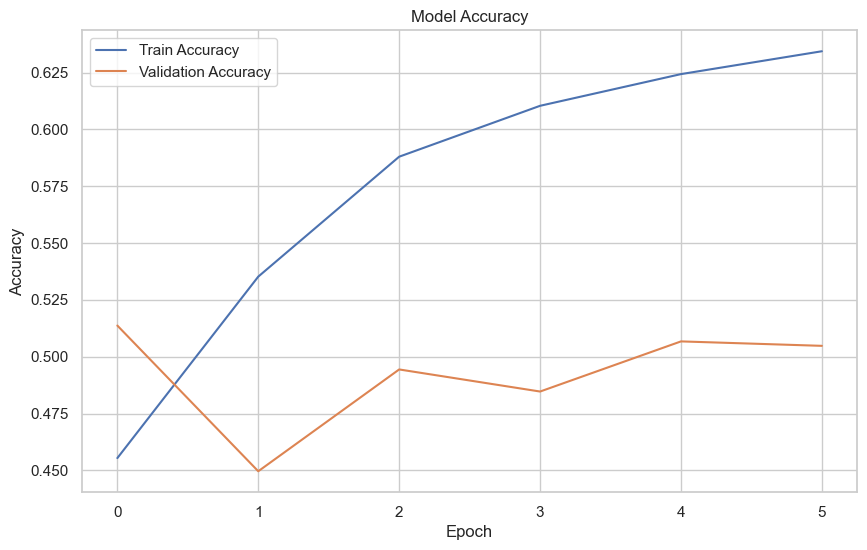

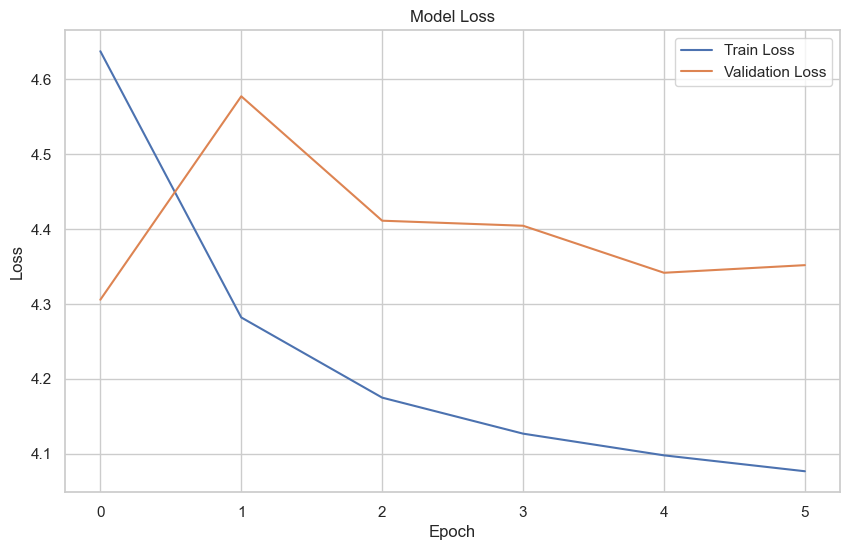

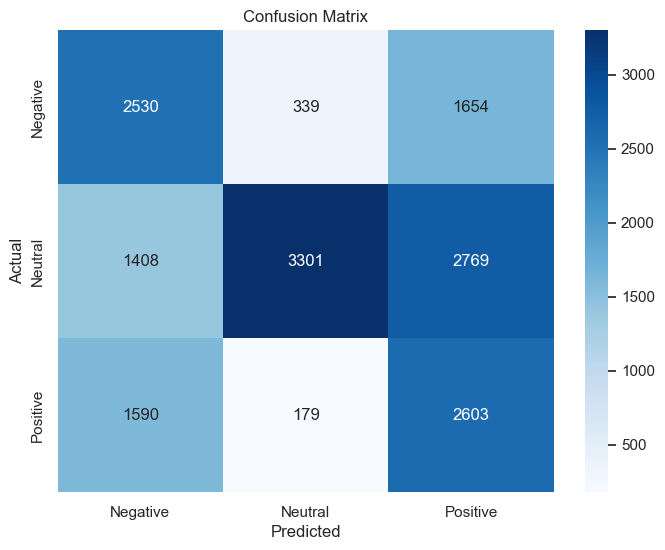

Tokenizer saved as 'tokenizer.pkl'.


In [71]:
%run lstm